Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       812
           1       0.94      0.93      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.82      0.82      0.82      4529
weighted avg       0.89      0.89      0.89      4529



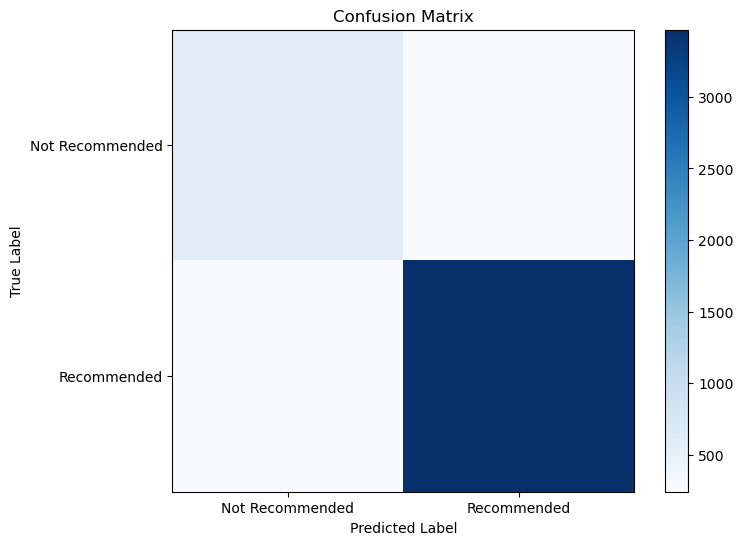

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("WomensClothingE_CommerceReviews.csv")

# Step 2: Data exploration and preprocessing (you may need more preprocessing based on your analysis)
# For this example, let's assume we want to work with "Review Text" as the feature and "Recommended IND" as the target
df = df[["Review Text", "Recommended IND"]].dropna()  # Select relevant columns and drop rows with missing values

# Step 3: Split the dataset into training (80%) and testing (20%) sets
X = df["Review Text"]
y = df["Recommended IND"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature extraction - Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Step 5: Model training - Use Multinomial Naive Bayes as a simple classification model
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_vectorized, y_train)

# Step 6: Make predictions on the test set
y_pred = nb_classifier.predict(x_test_vectorized)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(2), ["Not Recommended", "Recommended"])
plt.yticks(np.arange(2), ["Not Recommended", "Recommended"])
plt.show()
